# Lab Experiments

### Import Statements
##### The following modules will be helpful for performing the experiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Preprocessing
### Data Description:
    Title: Skin Segmentation
    Features: Blue, Green and Red Pixel Values
    Labels: 1 for when the sample is a skin sample, 2 when sample is not a skin sample
### Reading the data from the file

In [2]:
df = pd.read_csv("dataset.csv",sep = "\t", names = ["B", "G", "R", "Y"])
print(df)

          B    G    R  Y
0        74   85  123  1
1        73   84  122  1
2        72   83  121  1
3        70   81  119  1
4        70   81  119  1
...     ...  ...  ... ..
245052  163  162  112  2
245053  163  162  112  2
245054  163  162  112  2
245055  163  162  112  2
245056  255  255  255  2

[245057 rows x 4 columns]


In [3]:
df.head()

,B,G,R,Y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


### Splitting data into features and labels
##### Since the data consists of both features and labels together, we need to split it.

In [4]:
X_vals = df.values[:,0:3]
Y_vals = df.values[:, 3]
print(X_vals)
print(Y_vals)

[[ 74  85 123]
 [ 73  84 122]
 [ 72  83 121]
 ...
 [163 162 112]
 [163 162 112]
 [255 255 255]]
[1 1 1 ... 2 2 2]


### Splitting the data into training data and testing data
##### The data needs to be split to training and testing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_vals,
                                                    Y_vals,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [6]:
print("Training Data Features",X_train,
      "Training Data Labels",y_train,
      "Test Data Features",X_test,
      "Test Data Labels",y_test,
      sep = "\n")

Training Data Features
[[177  77 107]
 [179 165 123]
 [163 162 111]
 ...
 [199 197 163]
 [187 186 142]
 [175 185 232]]
Training Data Labels
[2 2 2 ... 2 2 1]
Test Data Features
[[ 74  77  28]
 [178 174 126]
 [ 93 139 216]
 ...
 [170 169 118]
 [  3   3   3]
 [ 81  82  40]]
Test Data Labels
[2 2 1 ... 2 2 2]


# Decision Tree Learning Implementation 

### Model Training

In [7]:
modelTraining = DecisionTreeClassifier(criterion = "gini",
                                       random_state = 100,
                                       max_depth = 3,
                                       min_samples_leaf = 2)
modelTraining.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=100)

### Model Testing

In [8]:
y_pred = modelTraining.predict(X_test)
print(y_pred)

[2 2 1 ... 2 2 2]


### Confusion Matrix

In [9]:
cmat = confusion_matrix(y_test,y_pred)
print(cmat)

[[14609   731]
 [ 1776 56402]]


### Accuracy of the model

In [10]:
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  96.58995076035801


### Visualization of the decision tree


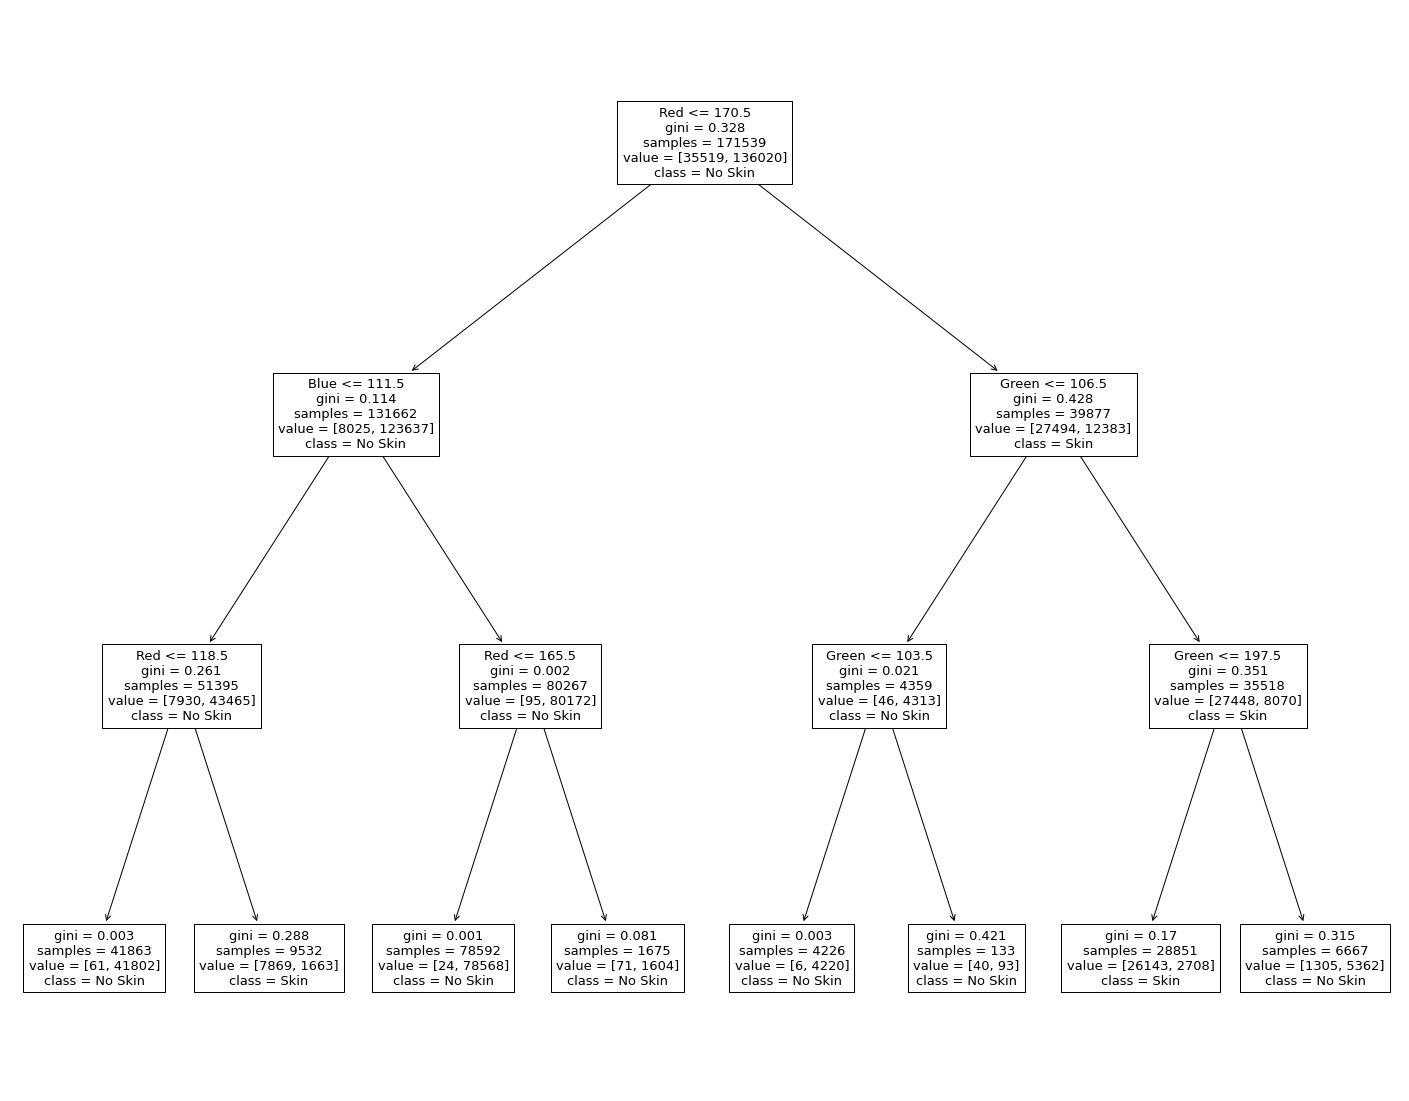

In [11]:
img = plt.figure(figsize = (25,20))
treeRep = tree.plot_tree(modelTraining,
                         feature_names = ["Blue","Green","Red"],
                         class_names = ["Skin","No Skin"])

# Logistic Regression Implementation 

### Model Training

In [12]:
logmodel = LogisticRegression()
fit_model = logmodel.fit(X_train,y_train)

### Model Testing

In [13]:
y_pred = logmodel.predict(X_test)
print(y_pred)

[2 2 1 ... 2 2 2]


### Confusion Matrix

In [14]:
cmat = confusion_matrix(y_test,y_pred)
print(cmat)

[[12683  2657]
 [ 3203 54975]]


### Accuracy of the model

In [15]:
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  92.02916292608613


# Multilayer Perceptron Classification Implementation 

### Model Training

In [16]:
p_clf=Perceptron(penalty="none",random_state=0)
p_clf.fit(X_train,y_train)

Perceptron(penalty='none')

### Model Testing

In [17]:
y_predP=p_clf.predict(X_test)

### Confusion Matrix

In [18]:
cmat = confusion_matrix(y_test,y_predP)
print(cmat)

[[  357 14983]
 [ 1685 56493]]


### Accuracy of the model

In [19]:
print("Accuracy: ", accuracy_score(y_test,y_predP)*100)

Accuracy:  77.32800130580266



# SVM Classification Implementation 

### Model Training

In [20]:
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

### Model Testing

In [21]:
svm_pred = svm.predict(X_test)
print(svm_pred)

[2 2 1 ... 2 2 2]


### Confusion Matrix

In [22]:
cmat = confusion_matrix(y_test, svm_pred)
print(cmat)

[[15340     0]
 [  114 58064]]


### Accuracy of the model

In [23]:
print("Accuracy: ", accuracy_score(y_test,svm_pred)*100)

Accuracy:  99.84493593405696


# Adaboost Algorithm Implementation 

### Model Training

In [24]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)

### Model Testing

In [25]:
y_pred = model.predict(X_test)
print(y_pred)

[2 2 1 ... 2 2 2]


### Confusion Matrix

In [26]:
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[13250  2090]
 [ 1444 56734]]


### Accuracy of the model

In [27]:
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  95.19301395576593


# Bagging Implementation Using Random Forests 

### Model Training

In [28]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=20,random_state=0) 
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=20, random_state=0)

### Model Testing

In [29]:
y_pred = regressor.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i] = int(y_pred[i])
print(y_pred)

[2. 2. 1. ... 2. 2. 2.]


### Confusion Matrix

In [30]:
cmat = confusion_matrix(y_test, y_pred)
print(cmat)

[[15337     3]
 [  136 58042]]


### Accuracy of the model

In [31]:
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  99.81093065643788



# K Means Clustering Implementation 

### Model Training

In [32]:
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(X_train)
print(set(identified_clusters))
df = pd.DataFrame(identified_clusters)
df

{0, 1, 2}


,0
0,0
1,0
2,0
3,0
4,0
...,...
171534,0
171535,0
171536,0
171537,0


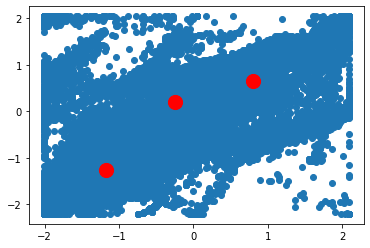

In [33]:
plt.scatter(X_train[:,0], 
            X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             
            c='red')


# Principle Component Analysis Implementation for Dimensionality Reduction

### Model Training

In [34]:
scalar = StandardScaler()
df = pd.DataFrame(X_train)
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

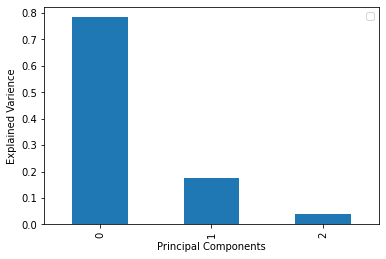

In [35]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');


# Evaluation of ML Algorithms with Balanced and Unbalanced Datasets

##### All the previous ML Models were trained using Balanced Datasets

##### Reading the Unbalanced Dataset

In [36]:
df = pd.read_csv("unbalanced_dataset.csv",sep = "\t" )
print(df)

       74  85  123  1
0      73  84  122  1
1      72  83  121  1
2      70  81  119  1
3      70  81  119  1
4      69  80  118  1
...    ..  ..  ... ..
79060  16  14    4  2
79061  16  14    4  2
79062  16  14    3  2
79063  20  17    3  2
79064  20  17    2  2

[79065 rows x 4 columns]


In [37]:
df.head()

,74,85,123,1
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


### Splitting data into features and labels

In [38]:
X_vals = df.values[:,0:3]
Y_vals = df.values[:, 3]
print(X_vals)
print(Y_vals)

[[ 73  84 122]
 [ 72  83 121]
 [ 70  81 119]
 ...
 [ 16  14   3]
 [ 20  17   3]
 [ 20  17   2]]
[1 1 1 ... 2 2 2]


### Splitting the data into training data and testing data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_vals,
                                                    Y_vals,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [40]:
print("Training Data Features",X_train,
      "Training Data Labels",y_train,
      "Test Data Features",X_test,
      "Test Data Labels",y_test,
      sep = "\n")

Training Data Features
[[165 179 232]
 [ 74 109 173]
 [200 211 255]
 ...
 [164 163 113]
 [187 186 142]
 [176 186 233]]
Training Data Labels
[1 1 1 ... 2 2 1]
Test Data Features
[[150 188 252]
 [ 62  63  21]
 [170 169 119]
 ...
 [109 147 205]
 [179 178 134]
 [192 192 152]]
Test Data Labels
[1 2 2 ... 1 2 2]


### Decision tree implementation using unbalanced dataset

In [41]:
modelTraining = DecisionTreeClassifier(criterion = "gini",
                                       random_state = 100,
                                       max_depth = 3,
                                       min_samples_leaf = 2)
modelTraining.fit(X_train,y_train)
y_pred = modelTraining.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  97.93844856661046


### Logistic Regression implementation using unbalanced dataset

In [42]:
logmodel = LogisticRegression()
fit_model = logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,log_predictions)*100)

Accuracy:  94.34654300168634


### Multilayer Perceptron implementation using unbalanced dataset

In [43]:
p_clf=Perceptron(penalty="none",random_state=0)
p_clf.fit(X_train,y_train)
y_predP=p_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_predP)*100)

Accuracy: 95.40050590219225


### SVM implementation using unbalanced dataset

In [44]:
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Accuracy:",accuracy_score(y_test, svm_pred)*100)

Accuracy: 99.8566610455312


### Adaboost Algorithm implementation using unbalanced dataset

In [45]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 96.77908937605396


### Bagging Implementation Using Random Forests and unbalanced dataset

In [46]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
regressor = RandomForestRegressor(n_estimators=20,random_state=0) 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i] = int(y_pred[i])
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 99.80607082630691
